<h1>Load yours data</h1>

In [2]:
# -- Import --
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import ccxt
sys.path.append( '../../utilities' )
from data_engine import DataEngine

# -- You can change the crypto pair ,the start date and the time interval below --
pair = 'ATOM/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='../database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Successfully load 24852 candles for ATOMUSDT
Data loaded 100%


<h1>Define your indicators</h1>

In [7]:
# -- Indicator variable --
trixLength = 8
trixSignal = 18
stochWindow = 14

# -- Drop all columns we do not need --
df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

# -- Indicators, you can edit every value --
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'], trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3)


print("Indicators loaded 100%")
df

Indicators loaded 100%


,open,high,low,close,volume,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,
2019-04-29 04:00:00,4.755,4.755,4.013,4.181,690466.650,NaN,NaN,NaN,NaN,NaN
2019-04-29 05:00:00,4.157,4.170,3.830,4.059,180104.055,NaN,NaN,NaN,NaN,NaN
2019-04-29 06:00:00,4.069,4.105,3.977,4.034,69274.460,NaN,NaN,NaN,NaN,NaN
2019-04-29 07:00:00,4.021,4.021,3.910,3.953,71914.210,NaN,NaN,NaN,NaN,NaN
2019-04-29 08:00:00,3.953,4.003,3.842,3.969,54571.016,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-01 15:00:00,31.120,31.490,30.590,31.080,312486.340,31.301230,0.226997,0.573278,-0.346281,0.000000
2022-03-01 16:00:00,31.050,31.430,30.680,30.900,243889.530,31.348964,0.152498,0.551211,-0.398713,0.000000
2022-03-01 17:00:00,30.900,31.190,30.600,30.910,158248.140,31.374960,0.082926,0.522167,-0.439242,0.005532


<h1>Overbought optimizer</h1>

Loading... 42 / 42


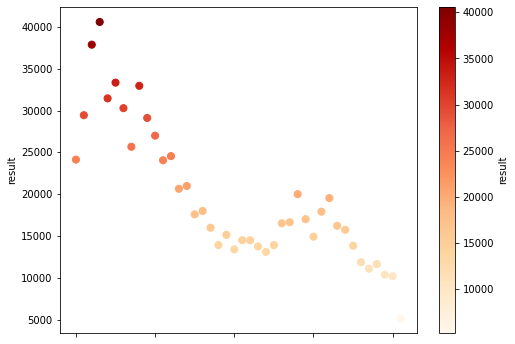

    param1        result
41   101.0   5178.234381
40   100.0  10221.788917
39    99.0  10402.829678
37    97.0  11121.715105
38    98.0  11663.882291
36    96.0  11895.560204
24    84.0  13125.266322
20    80.0  13420.355178
23    83.0  13776.664295
35    95.0  13864.770915
25    85.0  13929.611693
18    78.0  13937.641666
22    82.0  14509.044036
21    81.0  14516.131755
30    90.0  14938.164288
19    79.0  15159.145074
34    94.0  15763.274790
17    77.0  16007.486048
33    93.0  16238.731838
26    86.0  16540.243359
27    87.0  16663.519004
29    89.0  17032.094773
15    75.0  17602.429887
31    91.0  17925.761435
16    76.0  18004.233929
32    92.0  19547.952886
28    88.0  20014.040894
13    73.0  20657.064034
14    74.0  20990.838646
11    71.0  24057.974300
0     60.0  24137.985223
12    72.0  24555.072666
7     67.0  25672.034859
10    70.0  27001.162408
9     69.0  29113.505389
1     61.0  29441.200006
6     66.0  30281.062515
4     64.0  31448.286063
8     68.0  32949.133615


In [4]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [60, 102, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = i / 100

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))

<h2>Trix Parameters Optimizer</h2>

Loading... 260 / 260


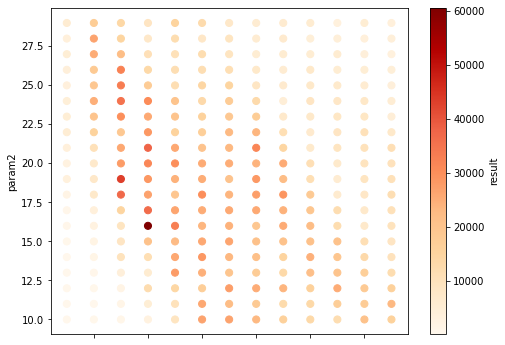

    param1  param2        result
0      5.0    10.0    118.717068
1      5.0    11.0    130.354825
2      5.0    12.0    177.874039
4      5.0    14.0    229.133529
3      5.0    13.0    245.911269
..     ...     ...           ...
67     8.0    17.0  36476.742129
48     7.0    18.0  37079.871888
71     8.0    21.0  37812.278666
49     7.0    19.0  43133.063687
66     8.0    16.0  60553.731524

[260 rows x 3 columns]


In [5]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [5, 18, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10, 30, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    trixLength = i
    trixSignal = j
    # -- Indicators, you can edit every value --
    dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
    dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
    dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'], trixSignal)
    dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']

    stochTop = 0.70

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i, 'param2': j,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Stock RSI Optimizer</h1>

Loading... 29 / 29


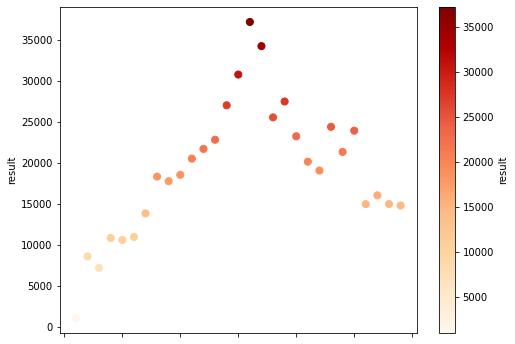

    param1        result
0      1.0   1000.000000
2      3.0   7176.925744
1      2.0   8575.056067
4      5.0  10576.811148
3      4.0  10819.108713
5      6.0  10939.249002
6      7.0  13824.087953
28    29.0  14775.061172
25    26.0  14944.698158
27    28.0  14956.020150
26    27.0  16022.143639
8      9.0  17745.164500
7      8.0  18305.291459
9     10.0  18518.680719
21    22.0  19044.394914
20    21.0  20124.816494
10    11.0  20499.663745
23    24.0  21316.524763
11    12.0  21683.492865
12    13.0  22800.836737
19    20.0  23221.998517
24    25.0  23906.125091
22    23.0  24376.224515
17    18.0  25527.469181
13    14.0  27001.162408
18    19.0  27464.444252
14    15.0  30750.836642
16    17.0  34219.618286
15    16.0  37164.134106


In [8]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [1, 30, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=i, smooth1=3, smooth2=3)

    stochTop = 0.70

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))